<a href="https://colab.research.google.com/github/jayshah19949596/tensorflow_tutorials/blob/master/SONA-Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

All files found!
Automatic pdb calling has been turned ON

Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile
Tests Passed
Tests Passed
Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.
Tests Passed
Tests Passed
Tests Passed
Tests Passed
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/maste

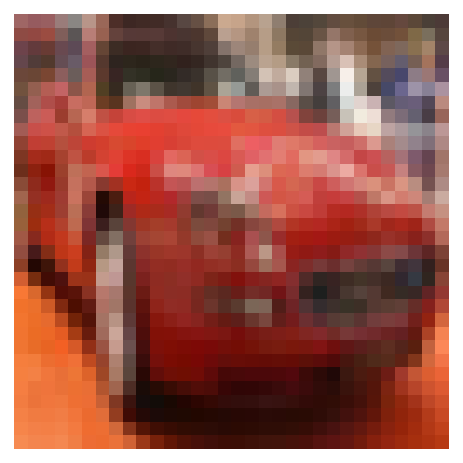

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile
from sklearn.metrics import accuracy_score
 
cifar10_dataset_folder_path = 'cifar-10-batches-py'
filename = 'knn_trained_model.sav'
save_model_path = './image_classification'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)



%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%pdb

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)




def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x = x/255.
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)





from sklearn import preprocessing

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    
    one_hot = np.zeros((len(x), 10), np.int_)
    idx = 0
    for label in x:
        one_hot[idx][label] = 1
        idx += 1
    
    return one_hot   

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)



import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))


import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    net_image_input = tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], name = "x")
    return net_image_input


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    net_label_input = tf.placeholder(tf.float32, [None, n_classes], name = "y")
    return net_label_input


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    keep_prob_input = tf.placeholder(tf.float32, name = "keep_prob")
    return keep_prob_input


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)


def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor         : TensorFlow Tensor
    :param conv_num_outputs : Number of outputs for the convolutional layer
    :param conv_ksize       : kernal size 2-D Tuple for the convolutional layer
    :param conv_strides     : Stride 2-D Tuple for convolution
    :param pool_ksize       : kernal size 2-D Tuple for pool
    :param pool_strides     : Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    color_channel = x_tensor.get_shape().as_list()[-1]
    
    # =====================================================
    #                  Set Weights
    # =====================================================
    wghts = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1], color_channel, conv_num_outputs], stddev=0.1))
    
    # =====================================================
    #                    Set Bias
    # =====================================================
    bias  = tf.Variable(tf.zeros([conv_num_outputs]))
    
    # =====================================================
    #               Perform Convolution
    # =====================================================
    conv  = tf.nn.conv2d(x_tensor, wghts, strides = [1, conv_strides[0], conv_strides[1], 1], padding = "SAME")
    conv  = tf.nn.bias_add(conv, bias)
    conv  = tf.nn.relu(conv)
    
    # =====================================================
    #               Perform Max Pooling
    # =====================================================
    conv  = tf.nn.max_pool(conv, 
                           ksize = [1, pool_ksize[0], pool_ksize[1], 1], 
                           strides = [1, pool_strides[0], pool_strides[1], 1], 
                           padding = "SAME")
    return conv 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)



def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    size = 1
    for x in x_tensor.get_shape().as_list():
        if (x is not None):
            size *= x
    flat_tensor = tf.reshape(x_tensor, [-1, size])
    return flat_tensor



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)





def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    ip    = x_tensor.get_shape().as_list()[1]
    
    # =====================================================
    #                  Set Weights
    # =====================================================
    wghts = tf.Variable(tf.random_normal([ip, num_outputs], stddev=0.1))
    
    # =====================================================
    #                    Set Bias
    # =====================================================
    bias  = tf.Variable(tf.zeros([num_outputs]))
    
    # =====================================================
    #       Perform linear combination of Wghts and Bias
    # =====================================================
    fc    = tf.add(tf.matmul(x_tensor, wghts), bias)
    fc    = tf.nn.relu(fc)
    return fc 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)




def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    ip       = x_tensor.get_shape().as_list()[1]
    
    # =====================================================
    #                  Set Weights
    # =====================================================
    wghts    = tf.Variable(tf.truncated_normal([ip, num_outputs], stddev=0.1))
    
    # =====================================================
    #                    Set Bias
    # =====================================================
    bias     = tf.Variable(tf.zeros([num_outputs]))
    
    # =====================================================
    #       Perform linear combination of Wghts and Bias
    # =====================================================
    op       = tf.add(tf.matmul(x_tensor, wghts), bias)
    return op

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)




import tensorflow as tf

def conv_net(x, keep_prob):
    conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
    conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
    conv3_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
    conv4_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

    # 1, 2
    conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
    # 9
    flat = tf.contrib.layers.flatten(conv4_bn)  

    # 10
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    # 11
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    # 12
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)    
    
    # 13
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)        
    full4 = tf.identity(full4, name='full4')

    # 14
    out = tf.contrib.layers.fully_connected(inputs=full4, num_outputs=10, activation_fn=None)
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

#===============================
#   Build the Neural Network 
#===============================

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)



def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, {x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)


def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    train_loss = session.run(cost, {x: feature_batch, y: label_batch, keep_prob: 1.})
    valid_loss = session.run(cost, {x: valid_features, y: valid_labels, keep_prob: 1.})
    valid_acc  = session.run(accuracy, {x: valid_features, y: valid_labels, keep_prob: 1.})
    print('Train Loss: {:>10.6f}, Validation Loss: {:>10.6f}, Validation Accuracy: {:.6f}'
          .format(train_loss, valid_loss, valid_acc))
    

# TODO: Tune Parameters
epochs = 1
batch_size = 256
keep_probability = 0.75

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), batch_features.shape, end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:   (40, 32, 32, 3)Train Loss:   2.228998, Validation Loss:   2.119542, Validation Accuracy: 0.195800


### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>1}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), batch_features.shape, end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

In [17]:

def data_processing_knn():
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        full4 = loaded_graph.get_tensor_by_name('full4:0')


        n_batches =  5
        full4_features, full_ys = None, None
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                full4_val =  sess.run(full4, feed_dict={loaded_x: batch_features, loaded_y: batch_labels, loaded_keep_prob: 1.0})
                # full4_val = full4_val.ravel()
                
                if full4_features is not None:
                    full4_features = np.vstack((full4_features, full4_val))
                    full_ys =  np.vstack((full_ys, batch_labels))
                elif full4_features is None:
                    full4_features = full4_val
                    full_ys = batch_labels
                # print(full_ys.shape)
                # print(full4_features.shape)
                # print("==========================")
        return full4_features, full_ys

def train_knn():
    from sklearn.neighbors import KNeighborsClassifier
    x_train, y_train = data_processing_knn()
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(x_train, y_train)
    return knn_model
knn_trained_model = train_knn()


INFO:tensorflow:Restoring parameters from ./image_classification


In [0]:
pickle.dump(knn_trained_model, open(filename, 'wb'))


In [0]:
knn_trained_model = pickle.load(open(filename, 'rb'))


In [19]:


def data_test_processing_knn():
    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        full4 = loaded_graph.get_tensor_by_name('full4:0')


        n_batches =  5
        full4_features, full_ys = None, None
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            full4_val =  sess.run(full4, feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            # full4_val = full4_val.ravel()
            
            if full4_features is not None:
                full4_features = np.vstack((full4_features, full4_val))
                full_ys =  np.vstack((full_ys, test_label_batch))
            elif full4_features is None:
                full4_features = full4_val
                full_ys = test_label_batch
            # print(full_ys.shape)
            # print(full4_features.shape)
            # print("==========================")
    return full4_features, full_ys


def test_knn(knn_model):
    x_test, y_test = data_test_processing_knn()
    predictions = knn_model.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    print(acc)
    # for pred, y in zip(predictions, y_test):
    #     print(pred)
    #     print(y)
    #     print("=======================================")

test_knn(knn_trained_model)

INFO:tensorflow:Restoring parameters from ./image_classification
0.731


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
full4 Tensor("full4:0", shape=(?, 1024), dtype=float32)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(256, 1024)
(16, 1024)
Testing Accuracy: 0.72255859375



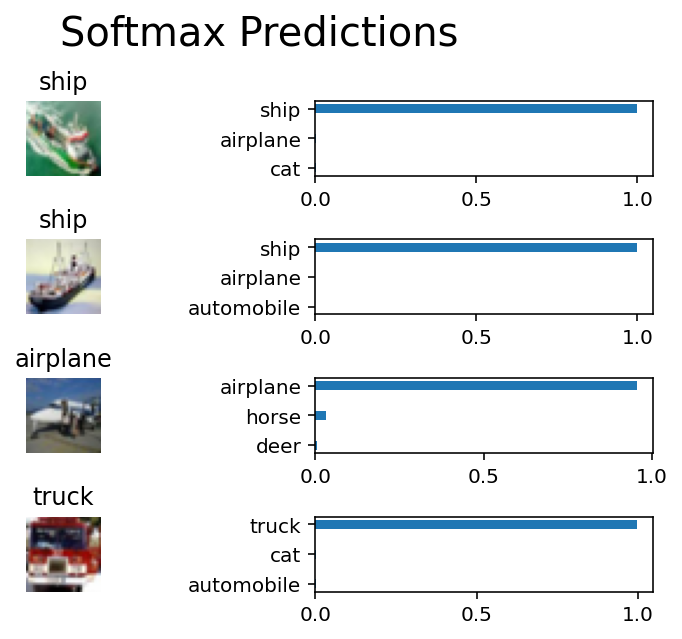

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        full4 = loaded_graph.get_tensor_by_name('full4:0')
        print("full4", full4)
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            full4_val =  sess.run(
                full4,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1
            # print(full4_val.shape)

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

In [0]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def create_adv_data():
    plane = "./airplane_bird_8075.png"
    cat_frog = "./cat_frog_8000.png"
    horse_deer = "./horse_deer_9406.png"
    labels = [0, 3, 7]

    plane_image = cv2.imread(plane)
    plane_image = cv2.resize(plane_image, (32, 32))

    cat_frog_image = cv2.imread(cat_frog)
    cat_frog_image = cv2.resize(cat_frog_image, (32, 32))

    horse_deer_image = cv2.imread(horse_deer)
    horse_deer_image = cv2.resize(horse_deer_image, (32, 32))

    print(plane_image.shape, cat_frog_image.shape, horse_deer_image.shape)
    data = np.stack((plane_image, cat_frog_image), axis=2)
    data = np.stack((data, horse_deer_image), axis=2)

    return data, one_hot_encode(labels)

def data_test_one_pix_processing_knn():
    
    x_adv, y_adv = create_adv_data()
    return None
    loaded_graph = tf.Graph()
    print(x_adv.shape, y_adv.shape)
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        full4 = loaded_graph.get_tensor_by_name('full4:0')
        

        n_batches = 1
        full4_features, full_ys = None, None
        for test_feature_batch, test_label_batch in helper.batch_features_labels(x_adv, y_adv, batch_size):
            full4_val =  sess.run(full4, feed_dict={loaded_x: batch_features, loaded_y: batch_labels, loaded_keep_prob: 1.0})
            # full4_val = full4_val.ravel()
            
            if full4_features is not None:
                full4_features = np.vstack((full4_features, full4_val))
                full_ys =  np.vstack((full_ys, batch_labels))
            elif full4_features is None:
                full4_features = full4_val
                full_ys = batch_labels
            # print(full_ys.shape)
            # print(full4_features.shape)
            # print("==========================")
    return full4_features, full_ys




x, y = create_adv_data()
print(x.shape)
print(y)

# 40, 32, 32, 3

(32, 32, 3) (32, 32, 3) (32, 32, 3)


ValueError: ignored

> /usr/local/lib/python3.6/dist-packages/numpy/core/shape_base.py(426)stack()
    424     shapes = {arr.shape for arr in arrays}
    425     if len(shapes) != 1:
--> 426         raise ValueError('all input arrays must have the same shape')
    427 
    428     result_ndim = arrays[0].ndim + 1

--KeyboardInterrupt--


In [1]:
def test_one_pix_knn(knn_model):
    x_test, y_test = data_test_one_pix_processing_knn()
    return None
    predictions = knn_model.predict(x_test)
    acc = accuracy_score(predictions, y_test)
    print(acc)
    # for pred, y in zip(predictions, y_test):
    #     print(pred)
    #     print(y)
    #     print("=======================================")

test_one_pix_knn(knn_trained_model)


NameError: ignored

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.